# Adversarial Attack on MNIST

Here, we use the tutorial "Deep MNIST for experts" inspired by this link- https://github.com/DobrinGanev/Deep-MNIST-for-Experts-Tensorflow-Example/blob/master/multilayer-convolutional-network.ipynb

The functions are modified to use tf.keras API.

# Import packages

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
from tqdm import tqdm

# Load MNIST dataset

In [2]:
#Read the input data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

# Check a sample image

Training image shape (55000, 784)
Training labels shape (55000, 10)
Shape of an image (1, 784)


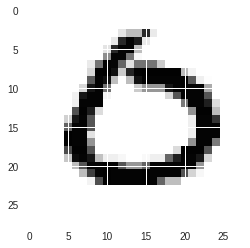

In [3]:
#Explore the data
sample_image = mnist.train.next_batch(1)[0]
print("Training image shape", mnist.train.images.shape)
print("Training labels shape", mnist.train.labels.shape)
print("Shape of an image", sample_image.shape)
sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image)

# Create placeholder for Image and Labels

In [0]:
x = tf.keras.backend.placeholder(shape=[None, 784], dtype=tf.float32)
y_ = tf.keras.backend.placeholder(shape=[None, 10], dtype=tf.float32)

# Create function for Convolution and MaxPooling based on the tutorial for "Deep MNIST for experts". Here conv2d and maxpooling use tf.keras API.

In [0]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Functions for convolution and pooling functions
def conv2d(x, W):
    return tf.keras.backend.conv2d(x, W, strides=(1, 1), padding='same')

def max_pooling_2x2(x):
    return tf.keras.backend.pool2d(x, pool_size=(2,2), strides=(2,2), padding='same')

# Create Convolutional Neural Network

In [0]:
x_image = tf.reshape(x, [-1,28,28,1])

# Conv layer 1 - 32x5x5
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
x_pool1 = max_pooling_2x2(x_conv1)

# Conv layer 2 - 64x5x5
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
x_conv2 = tf.nn.relu(conv2d(x_pool1, W_conv2) + b_conv2)
x_pool2 = max_pooling_2x2(x_conv2)

# Flatten
x_flat = tf.reshape(x_pool2, [-1, 7*7*64])

# Dense fully connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
x_fc1 = tf.nn.relu(tf.matmul(x_flat, W_fc1) + b_fc1)

# Regularization with dropout
keep_prob = tf.placeholder(tf.float32)
x_fc1_drop = tf.nn.dropout(x_fc1, keep_prob)

# Classification layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(x_fc1_drop, W_fc2) + b_fc2

# Probabilities, Loss, Optimizer and Test Accuracy initialization

In [0]:
# Get Probabilities
y = tf.nn.softmax(y_conv)

In [0]:
# Loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [0]:
# Test accuracy of model
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize global variables for training

In [0]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# Start training

In [11]:
for i in tqdm(range(1000)):
    batch = mnist.train.next_batch(100)
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))

    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.4})

  0%|          | 1/1000 [00:02<45:11,  2.71s/it]

step 0, training accuracy 0.1


 21%|██        | 210/1000 [00:05<00:11, 69.50it/s]

step 200, training accuracy 0.91


 41%|████      | 409/1000 [00:08<00:08, 69.61it/s]

step 400, training accuracy 0.95


 61%|██████    | 611/1000 [00:11<00:05, 67.84it/s]

step 600, training accuracy 0.97


 81%|████████  | 808/1000 [00:14<00:02, 70.00it/s]

step 800, training accuracy 0.92


100%|██████████| 1000/1000 [00:17<00:00, 58.16it/s]


# Print Accuracy on test data

In [12]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images[0:500], 
                                                  y_: mnist.test.labels[0:500], keep_prob: 1.0}))

test accuracy 0.97


# Filter Index for 2s images and the images

In [0]:
index_of_2s = np.nonzero(mnist.test.labels[0:500][:,2])[0][0:10]
x_batch = mnist.test.images[index_of_2s]
y_batch = mnist.test.labels[index_of_2s]

# Print probabilities and predictions for chosen images

In [14]:
prediction = tf.argmax(y,1)
prediction_val = prediction.eval(feed_dict={x: x_batch, keep_prob: 1.0}, session=sess)
print("predictions", prediction_val)
probabilities = y
probabilities_val = probabilities.eval(feed_dict={x: x_batch, keep_prob: 1.0}, session=sess)
print ("probabilities", probabilities_val)

predictions [2 2 2 2 2 2 2 2 2 2]
probabilities [[2.72483448e-04 1.15437950e-04 9.99216199e-01 2.04494092e-04
  6.14753137e-09 1.52973244e-05 9.61880141e-05 5.20937959e-08
  7.97257817e-05 1.27999570e-07]
 [3.16149453e-05 1.80739498e-05 9.99733627e-01 1.63171586e-04
  1.37366442e-07 1.46625207e-05 4.61351965e-06 1.24944827e-05
  1.83404081e-05 3.22430901e-06]
 [4.04461706e-03 2.16605188e-03 9.20817137e-01 6.78299889e-02
  2.62915660e-06 1.71217637e-03 1.97183853e-03 1.18419521e-04
  1.31578057e-03 2.13719868e-05]
 [3.91915644e-04 4.57565719e-03 9.90475893e-01 2.36774678e-03
  5.81538130e-04 5.89201460e-04 5.97138773e-04 8.30238278e-05
  3.24926543e-04 1.29087375e-05]
 [9.34697800e-06 1.76107365e-04 9.99470055e-01 3.28130882e-05
  1.24871440e-04 7.78610320e-06 1.39997777e-04 9.22872516e-07
  3.19355022e-05 6.24747327e-06]
 [1.00341788e-03 1.54109750e-06 9.97800291e-01 1.16561353e-03
  7.14979436e-08 1.76301000e-05 4.67779046e-07 6.45487398e-06
  4.36226173e-06 1.20595544e-07]
 [1.072365

# Plot images with probabilities

Correct label 2
Predicted label: 2
Confidence: 0.9992162


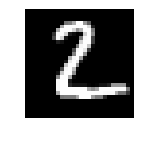

Correct label 2
Predicted label: 2
Confidence: 0.9997336


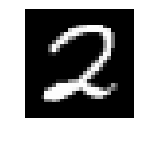

Correct label 2
Predicted label: 2
Confidence: 0.92081714


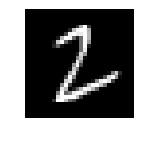

Correct label 2
Predicted label: 2
Confidence: 0.9904759


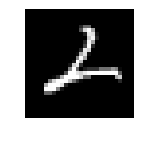

Correct label 2
Predicted label: 2
Confidence: 0.99947006


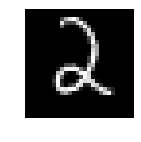

Correct label 2
Predicted label: 2
Confidence: 0.9978003


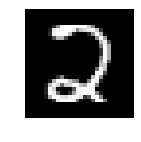

Correct label 2
Predicted label: 2
Confidence: 0.9753974


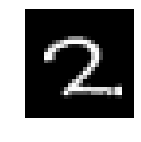

Correct label 2
Predicted label: 2
Confidence: 0.99999964


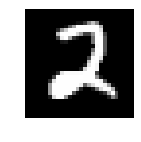

Correct label 2
Predicted label: 2
Confidence: 0.9982829


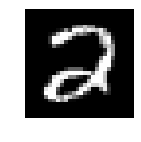

Correct label 2
Predicted label: 2
Confidence: 0.74350935


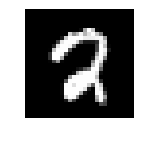

In [15]:
for i in range(0, 10):
    print('Correct label', np.argmax(y_batch[i]))
    print('Predicted label:', prediction_val[i])
    print('Confidence:', np.max(probabilities_val[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(x_batch[i].reshape([28, 28]),cmap = "gray")
    plt.show()

# Initialize target label and the matrix for the adversarial attack

In [0]:
target_number = 6
target_labels = np.zeros((10, 10))
target_labels[:, target_number] = 1

In [17]:
target_labels

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

# Initialize gradient for Adversarial attack

In [0]:
img_gradient = tf.gradients(cross_entropy, x)[0]

# Initialize value for step size and number of steps

In [0]:
step_size = 0.01
steps = 10

# Calculate Image Gradient and run FGSM attack

In [20]:
adversarial_img = x_batch.copy()
adv_img_hist = list()
prob2_hist = list()
prob6_hist = list()
for i in range(0, steps):
    gradient = img_gradient.eval({x: adversarial_img, y_: target_labels, keep_prob: 1.0})
    adversarial_img = adversarial_img + step_size * np.sign(gradient)
    adv_img_hist.append(adversarial_img)
    prediction = tf.argmax(y,1)
    prediction_val = prediction.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print("predictions", prediction_val)
    probabilities = y
    probabilities_val = probabilities.eval(feed_dict = {x: adversarial_img, keep_prob: 1.0}, session=sess)
    print('Confidence 2:', probabilities_val[:, 2])
    print('Confidence 6:', probabilities_val[:, 6])
prob2_hist.append(probabilities_val[:,2])
prob6_hist.append(probabilities_val[:,6])

predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.9996457  0.9998702  0.9407048  0.99387324 0.9997507  0.99887675
 0.9851317  0.99999976 0.99903935 0.82104206]
Confidence 6: [2.7716091e-05 1.1834917e-06 6.7197107e-04 2.1129129e-04 4.7039859e-05
 1.2415822e-07 3.2681477e-04 1.4046408e-09 1.8461017e-06 1.5854194e-03]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.9998605  0.99993956 0.9634883  0.9967595  0.9999081  0.9994838
 0.9925056  1.         0.9995733  0.87844485]
Confidence 6: [5.7961674e-06 2.6614705e-07 1.7386091e-04 5.3692729e-05 1.1955336e-05
 2.7095917e-08 9.3742878e-05 2.5592325e-10 4.1908194e-07 5.0657126e-04]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.99994564 0.9999714  0.9786202  0.99833906 0.9999627  0.9997701
 0.9961287  1.         0.99977225 0.9233672 ]
Confidence 6: [1.3143884e-06 6.4762204e-08 4.9292976e-05 1.4293257e-05 3.0800397e-06
 6.1677268e-09 2.9061461e-05 4.7810363e-11 1.0954915e-07 1.6989443e-04]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 

# Plot Image grid of original image, adversarial image and noise

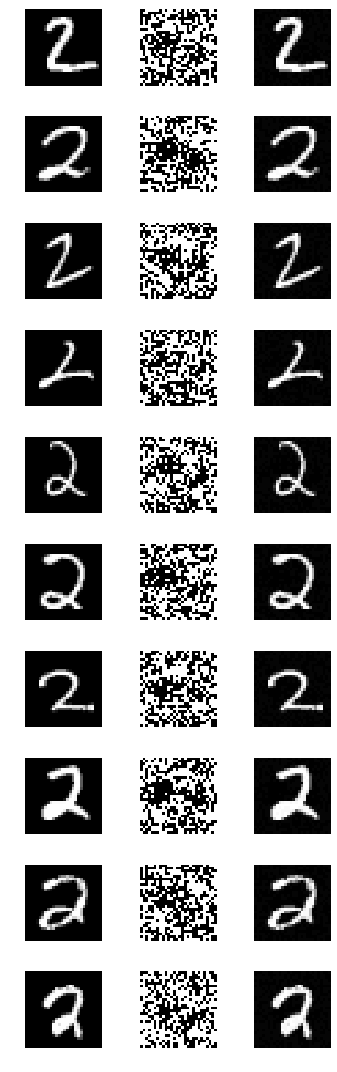

In [21]:
f, axarr = plt.subplots(10, 3, figsize=(5,15))
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
for i in range(10):
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()
    axarr[i,2].set_axis_off()
    axarr[i,0].imshow(x_batch[i].reshape([28, 28]), cmap = "gray")
    axarr[i,1].imshow((adv_img_hist[0][i] - x_batch[i]).reshape([28, 28]), cmap = "gray")
    axarr[i,2].imshow((adv_img_hist[0][i]).reshape([28, 28]), cmap="gray")
    
plt.tight_layout()
plt.show()